# Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# features with na
train = train.copy()
test = test.copy()

na_features_train = [features for features in train.columns if (train[features].isna().sum())]
na_features_test = [features for features in test.columns if (test[features].isna().sum())]

print(na_features_train)
print(na_features_test)
print()


#count of features with na
na_features_train_count = {features:train[features].isna().sum() for features in na_features_train}
na_features_test_count = {features:test[features].isna().sum() for features in na_features_test}

print(na_features_train_count)
print(na_features_test_count)

['Age', 'Cabin', 'Embarked']
['Age', 'Fare', 'Cabin']

{'Age': 177, 'Cabin': 687, 'Embarked': 2}
{'Age': 86, 'Fare': 1, 'Cabin': 327}


0    549
1    342
Name: Survived, dtype: int64

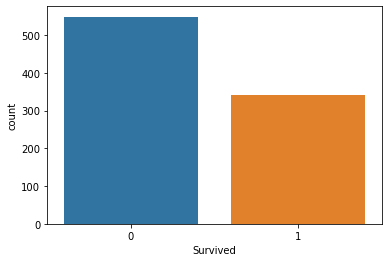

In [7]:
# plotting survival counts
sns.countplot(x='Survived',data=train)
train['Survived'].value_counts()

# Numerical variables

In [8]:
train = train.copy()
test = test.copy()

numerical_features_train = train.select_dtypes(exclude='O').columns
numerical_features_test = test.select_dtypes(exclude='O').columns

print(numerical_features_train)
print(numerical_features_test)


train[numerical_features_train]

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


## Discrete variables

In [9]:
discrete_numerical_features_train = [features for features in numerical_features_train if len(train[features].unique())<25]
discrete_numerical_features_test = [features for features in numerical_features_test if len(test[features].unique())<25]

print(discrete_numerical_features_train)
print(discrete_numerical_features_test)
print()


discrete_numerical_features_train_count = {features:len(train[features].unique()) for features in discrete_numerical_features_train}
discrete_numerical_features_test_count = {features:len(test[features].unique()) for features in discrete_numerical_features_test}

print(discrete_numerical_features_train_count)
print(discrete_numerical_features_test_count)

['Survived', 'Pclass', 'SibSp', 'Parch']
['Pclass', 'SibSp', 'Parch']

{'Survived': 2, 'Pclass': 3, 'SibSp': 7, 'Parch': 7}
{'Pclass': 3, 'SibSp': 7, 'Parch': 8}


3    491
1    216
2    184
Name: Pclass, dtype: int64


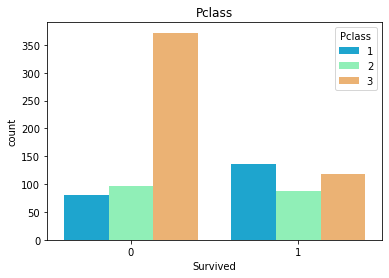

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


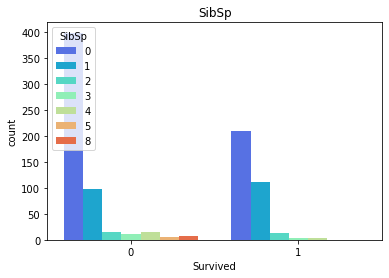

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


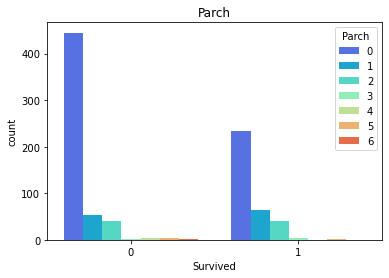

In [10]:
for features in discrete_numerical_features_train:
    if features not in 'Survived':
        print(train[features].value_counts())
        sns.countplot(x='Survived',hue=features,data=train,palette='rainbow')
        plt.title(features)
        plt.show()

    Poor people died more because Rich people paid money and succeed in escaping
    Those people who does not have any sibling or spouse died more.
    Those people who does not have any parent or child died 
    
 ### Pclass is an ordinal variable


## Continuous variables

In [11]:
continuous_numerical_features_train = [features for features in numerical_features_train if features not in discrete_numerical_features_train]
continuous_numerical_features_test = [features for features in numerical_features_test if features not in discrete_numerical_features_test]

print(continuous_numerical_features_train)
print(continuous_numerical_features_test)

['PassengerId', 'Age', 'Fare']
['PassengerId', 'Age', 'Fare']


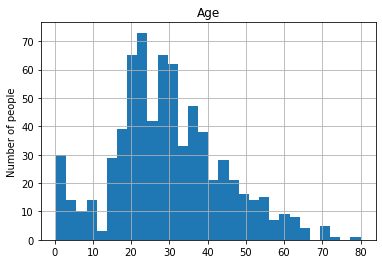

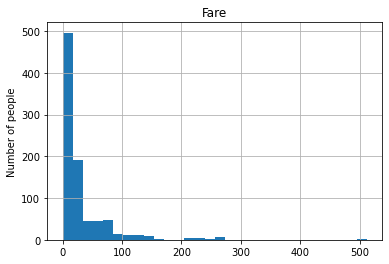

In [12]:
for features in continuous_numerical_features_train:
    if features not in 'PassengerId':
        train[features].hist(bins=30)
        plt.title(features)
        plt.ylabel('Number of people')
        plt.show()

# Categorical Variable

In [13]:
categorical_features_train = train.select_dtypes(include='O').columns
categorical_features_test = test.select_dtypes(include='O').columns

print(categorical_features_train)
print(categorical_features_test)
print()

categorical_features_train_count = {features:len(train[features].unique()) for features in categorical_features_train}
categorical_features_test_count = {features:len(test[features].unique()) for features in categorical_features_test}

print(categorical_features_train_count)
print(categorical_features_test_count)


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

{'Name': 891, 'Sex': 2, 'Ticket': 681, 'Cabin': 148, 'Embarked': 4}
{'Name': 418, 'Sex': 2, 'Ticket': 363, 'Cabin': 77, 'Embarked': 3}


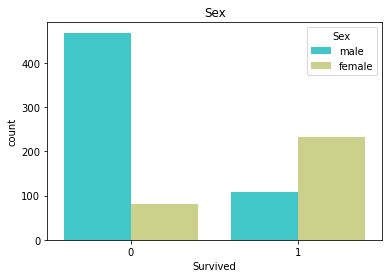

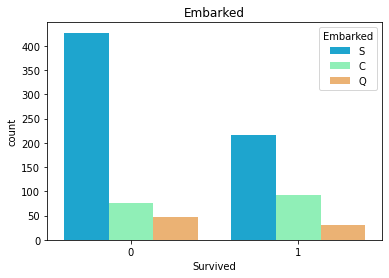

In [14]:
for features in categorical_features_train:
    if features not in 'Name'+'Ticket'+'Cabin':
        sns.countplot(x='Survived',hue=features,data=train,palette='rainbow')
        plt.title(features)
        plt.show()

Male died more then women

In [15]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


No independent Features are higly correlated

# Feature Engineering

First of all I'm dropping some columns because they will not be useful for prediction

In [16]:
train.drop(columns=['PassengerId'],inplace=True)
test.drop(columns=['PassengerId'],inplace=True)

In [17]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Getting first letter from cabin

In [19]:
# train['Cabin'].fillna('Missing',inplace = True)
# train['Cabin'] = train['Cabin'].astype(str).str[0]
# train.groupby(['Cabin'])['Survived'].mean().sort_values()
# labels = train.groupby(['Cabin'])['Survived'].mean().sort_values().index
# label_two = {k:i for i,k in enumerate (labels ,0)}
# train['Cabin_ordinal_label'] = train['Cabin'].map(label_two)
# train

## Getting Titles from name

In [20]:
train['Title'] = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]
test['Title'] = [i.split(',')[1].split('.')[0].strip() for i in test['Name']]

In [21]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [22]:
def title_converted(feature):
    result = ''
    if feature in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
        result = feature
    return result

In [23]:
train['Title'].map(title_converted)
test['Title'].map(title_converted)

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      rare
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [25]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


## Filling the missing value

In [26]:
mean_age_train = train.groupby(['Sex'])['Age'].mean()
mean_age_test = test.groupby(['Sex'])['Age'].mean()

print(mean_age_train)
print(mean_age_test)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64


In [27]:
train['Age'] = np.where(train['Sex']=='male',31,28)
test['Age'].fillna(30,inplace=True)

In [28]:
train['Embarked'].mode()
test['Embarked'].mode()

0    S
dtype: object

In [29]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

## family size and categorizing it based on family size

In [30]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,31,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,28,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,28,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,31,0,0,373450,8.0500,NaN,S,Mr


In [31]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [32]:
# because in Eda we have seen that the those who were alone died more.
train['Family_size'] = train['Parch'] + train['SibSp']+1
test['Family_size'] = test['Parch'] + test['SibSp']+1

In [33]:
#categorizing family size

def category_family_size(size):
    category = ''
    if (size<=1):
        category = 'Loner'
    elif (size <= 4):
        category = 'small'
    else:
        category = 'large'
    return category

In [34]:
train['Family_group'] = train['Family_size'].apply(category_family_size)
test['Family_group'] = test['Family_size'].apply(category_family_size)

## Calculating fare per person and categorizing it based on family size

In [35]:
# because test data have one nan value in Fare which 
test.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    115.591168
        male       75.586551
2       female     26.438750
        male       20.184654
3       female     13.735129
        male       11.826350
Name: Fare, dtype: float64

In [36]:
test['Fare'].fillna(11.8263,inplace=True) # Because the nan value is where, where there is male and pclass - 3

In [37]:
train['Fare_per_person'] = train['Fare']/train['Family_size']
test['Fare_per_person'] = test['Fare']/test['Family_size']

In [38]:
train['Fare_per_person'].unique()

array([  3.625     ,  35.64165   ,   7.925     ,  26.55      ,
         8.05      ,   8.4583    ,  51.8625    ,   4.215     ,
         3.7111    ,  15.0354    ,   5.56666667,   4.46785714,
         7.8542    ,  16.        ,   4.85416667,  13.        ,
         9.        ,   7.225     ,  26.        ,   8.0292    ,
        35.5       ,   4.48392857,  43.83333333,   7.8792    ,
         7.8958    ,  27.7208    ,  73.2604    ,   7.75      ,
        10.5       ,  41.0854    ,   7.2292    ,   6.        ,
         5.62085   ,   4.7375    ,  10.3948    ,   7.2264    ,
         8.9       ,   6.61458333,   7.8       ,  38.3646    ,
        30.9896    ,   6.9375    ,   5.8625    ,  80.        ,
        41.7375    ,   4.65      ,   5.08193333,   8.1583    ,
         1.13214286,   2.8875    ,  73.5       ,   7.2271    ,
        56.4958    ,   7.65      ,   9.66666667,  12.475     ,
         9.5       ,   7.7875    ,  47.1       ,   3.9625    ,
         6.875     ,  30.5875    ,   5.14375   ,   7.25

In [39]:
#categorizing fare per person price

def category_fare(fare):
    category = ''
    if fare <= 4:
        category = 'Very_low'
    elif fare <= 10:
        category = 'low'
    elif fare <= 20:
        category = 'mid'
    elif fare <= 45:
        category = 'high'
    else:
        category = "very_high"
    return category
    

In [40]:
train['fare_group'] = train['Fare_per_person'].map(category_fare)
test['fare_group'] = test['Fare_per_person'].map(category_fare)

In [41]:
train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Family_group,Fare_per_person,fare_group
0,0,3,male,31,1,0,7.2500,S,Mr,2,small,3.62500,Very_low
1,1,1,female,28,1,0,71.2833,C,Mrs,2,small,35.64165,high
2,1,3,female,28,0,0,7.9250,S,Miss,1,Loner,7.92500,low
3,1,1,female,28,1,0,53.1000,S,Mrs,2,small,26.55000,high
4,0,3,male,31,0,0,8.0500,S,Mr,1,Loner,8.05000,low


In [42]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Family_group,Fare_per_person,fare_group
0,3,male,34.5,0,0,7.8292,Q,Mr,1,Loner,7.829200,low
1,3,female,47.0,1,0,7.0000,S,Mrs,2,small,3.500000,Very_low
2,2,male,62.0,0,0,9.6875,Q,Mr,1,Loner,9.687500,low
3,3,male,27.0,0,0,8.6625,S,Mr,1,Loner,8.662500,low
4,3,female,22.0,1,1,12.2875,S,Mrs,3,small,4.095833,low


In [43]:
train.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Title              0
Family_size        0
Family_group       0
Fare_per_person    0
fare_group         0
dtype: int64

In [44]:
test.isnull().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Title              0
Family_size        0
Family_group       0
Fare_per_person    0
fare_group         0
dtype: int64

In [45]:
# now we don't have any null values in train and test

# Feature Engineering

### One hot encoding

In [46]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Family_group,Fare_per_person,fare_group
0,0,3,male,31,1,0,7.2500,S,Mr,2,small,3.62500,Very_low
1,1,1,female,28,1,0,71.2833,C,Mrs,2,small,35.64165,high
2,1,3,female,28,0,0,7.9250,S,Miss,1,Loner,7.92500,low
3,1,1,female,28,1,0,53.1000,S,Mrs,2,small,26.55000,high
4,0,3,male,31,0,0,8.0500,S,Mr,1,Loner,8.05000,low


In [47]:
new_category = ['Sex','Embarked','Title','Family_group','fare_group']

In [48]:
print(len(train['Title'].unique()))
print(len(test['Title'].unique()))

17
9


We can see that there are different number of unique categories in train and test.
So if we will create dummy variable then we get different number of features in train and test.
And thus, we get error if we train our model on train data and test our model on test data because both have diff dimension.

That's why I'm splitting my train data only and performing train test.

In [49]:
for features in new_category:
    dummy = pd.get_dummies(train[features],drop_first=True)
    train = pd.concat([train,dummy],axis=1)
    train.drop(columns=[features],axis=1,inplace=True)

In [50]:
for features in new_category:
    dummy = pd.get_dummies(test[features],drop_first=True)
    test = pd.concat([test,dummy],axis=1)
    test.drop(columns=[features],axis=1,inplace=True)

In [51]:
min_max = MinMaxScaler()
scaled_data_train = min_max.fit_transform(train)
train = pd.DataFrame(scaled_data_train,columns=train.columns)

scaled_data_test = min_max.fit_transform(test)
test = pd.DataFrame(scaled_data_test,columns=test.columns)

In [52]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Fare_per_person,male,Q,...,Ms,Rev,Sir,the Countess,large,small,high,low,mid,very_high
0,0.0,1.0,1.0,0.125,0.0,0.014151,0.1,0.007076,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.125,0.0,0.139136,0.1,0.069568,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.000,0.0,0.015469,0.0,0.015469,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.125,0.0,0.103644,0.1,0.051822,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.000,0.0,0.015713,0.0,0.015713,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

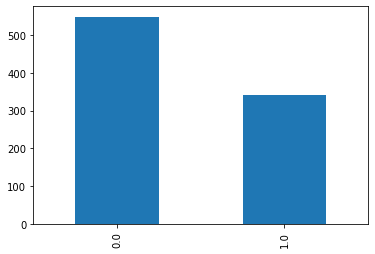

In [53]:
pd.value_counts(train['Survived']).plot.bar()

### The data is almost imbalanced. That's why i'm oversampling it.

In [54]:
X = train.drop('Survived',axis=1)
y=train['Survived']

In [55]:
# The ratio of X and 
over = RandomOverSampler(sampling_strategy=1)
X,y = over.fit_resample(X,y)

[5.51784315e-02 4.74168927e-02 1.46928511e-02 5.30712515e-02
 1.29327820e-01 1.31153562e-02 1.69016891e-01 1.90545529e-01
 7.20790323e-03 1.94376768e-02 5.28847624e-03 9.45501379e-04
 5.16173716e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.88100857e-02 1.75971108e-04 0.00000000e+00 0.00000000e+00
 3.16953675e-03 1.32118790e-01 0.00000000e+00 4.42434614e-04
 0.00000000e+00 0.00000000e+00 1.17023955e-02 3.83647116e-02
 2.01250642e-03 3.46251360e-02 9.59452015e-04 2.32278172e-03]


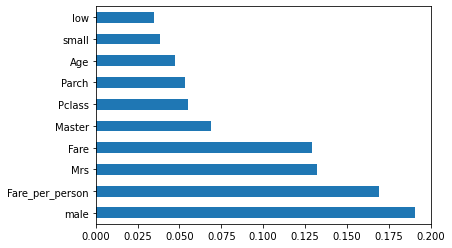

In [56]:
tree_reg = ExtraTreeClassifier()
tree_reg.fit(X,y)
print(tree_reg.feature_importances_)

#Top 5 important feature
features_importance = pd.Series(tree_reg.feature_importances_,index=X.columns)
features_importance.nlargest(10).plot(kind='barh')
plt.show()

In [57]:
# train.to_csv('train_refined.csv')

In [58]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
model = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 )

In [ ]:
model_cv = RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring='accuracy',cv=cv,random_state = 42,n_iter=10)
model_cv.fit(X,y)
y_pred = model_cv.predict(X)

In [ ]:
accuracy_score(y,y_pred)

In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y, y_pred))